# Setting

In [1]:
from pf_utils import DataManager, BacktestManager, MomentumPortfolio

WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [2]:
metrics2 = [
    'cagr', 'monthly_vol', 'monthly_sharpe',
    'max_drawdown', 'avg_drawdown','avg_drawdown_days', 
]

path_data = 'data'

# Universe

In [3]:
k200 = DataManager(
    file = 'kospi200_prices_240708.csv',
    #file = 'kospi200_prices_240707l.csv',
    universe = 'KOSPI200',
    path = path_data
)

### from file

In [4]:
k200.upload()
df_k200 = k200.df_prices
df_k200.tail()

200 assets from 2021-01-04 to 2024-07-08 uploaded.
df_prices updated


,323410,069260,007070,259960,000150,097950,003490,029780,022100,004000,...,073240,326030,039130,064350,017800,204320,272210,008770,042670,128940
Date,,,,,,,,,,,,,,,,,,,,,
2024-07-02,20800.0,19400,20300,271000.0,204500,370000,22850,38400,36750,45500,...,6390,78400,56000,38400,41950,43350,17930,52700,7720,285000
2024-07-03,20800.0,19400,20150,272500.0,225000,365500,22700,39300,36850,46400,...,6320,77500,55800,37650,41450,43400,17960,52600,7760,280500
2024-07-04,21050.0,19550,20300,272000.0,230000,365500,22750,39800,37050,46400,...,6400,77100,55700,38100,42350,44100,18170,51300,7840,278500
2024-07-05,21400.0,19420,20200,280000.0,223000,364000,22650,39550,37350,46150,...,6520,79000,55500,38000,42250,42500,18080,51700,7750,287000
2024-07-08,21700.0,19280,20150,278000.0,221000,371500,22700,39100,37850,46250,...,6290,79900,55800,38900,42050,41950,18320,52400,7680,280000


### from web

In [5]:
k200.download(close_today=False)

Execution time of download: 0.49 secs


In [6]:
# download historicals without update of kospi200 constituents as the above failure
k200.download(tickers=df_k200.columns, close_today=False)

200 assets from 2021-01-04 to 2024-07-05 downloaded.
data/kospi200_prices_240705.csv saved.
df_prices updated
Execution time of download: 28.06 secs


In [7]:
df_k200 = k200.df_prices
df_k200.tail()

,005930,000660,373220,005380,207940,000270,068270,105560,005490,055550,...,105630,093370,039130,032350,178920,285130,009900,016380,005250,000670
Date,,,,,,,,,,,,,,,,,,,,,
2024-07-01,81800,235500,347000.0,286000,759000,128600,184100,79600,370500,47850,...,19700,7480,58400,9880,27150,49200,14240,6460,14130,338500
2024-07-02,81800,232000,343500.0,272500,810000,123600,184500,83200,365500,49500,...,19460,7210,56000,9680,27600,48200,14390,6480,14010,336000
2024-07-03,81800,236000,358000.0,276000,810000,123700,181800,84400,370500,51100,...,18750,7300,55800,9550,27050,47850,14690,6410,13010,332000
2024-07-04,84600,230000,359000.0,277500,803000,125600,182900,85900,375000,52500,...,19060,7480,55700,9600,28550,48250,15170,6540,13200,336500
2024-07-05,87100,236000,357500.0,281000,803000,126300,185800,88200,377000,53500,...,19380,7670,55500,9610,27950,48350,14900,6530,13600,338000


# BacktestManager

## create class

In [7]:
kwargs_bm = dict(
    initial_capital = 10000000,
    commissions = 0,
    align_axis = 1, 
    days_in_year = 246
)
bm = BacktestManager(df_k200, **kwargs_bm)

15 assets removed for shorter periods (7.5%)
running self.util_check_days_in_year to check days in a year


In [8]:
bm.util_check_days_in_year(freq='Y').agg(['mean', 'min', 'max'])

mean    246.0
min     246.0
max     246.0
dtype: float64

## define strategy by keywords

In [9]:
kwargs_build = dict(
    name = 'strategy1',
    freq = 'M', select = 'Momentum', weigh = 'ERC',
    n_assets=5, lookback=12, lag=0
)
bm.build(**kwargs_build)

In [10]:
kwargs_build = dict(
    name = 'strategy2',
    freq = 'M', select = 'Momentum', weigh = 'equally',
    n_assets=5, lookback=12, lag=0
)
bm.build(**kwargs_build)

*you could use build_batch instead*

In [11]:
kwargs_build = dict(
    freq = 'M', select = 'Momentum',
    n_assets=5, lookback=12, lag=0
)
kwa_list = [
    {'name':'strategy1', 'weigh':'ERC'},
    {'name':'strategy2', 'weigh':'equally'}
]
bm.build_batch(*kwa_list, **kwargs_build)

## buy and hold

In [12]:
bm.buy_n_hold('buy&hold', weights='005930')

RunOnce selected


## baseline

In [13]:
bm.benchmark_ticker(name = 'KOSPI', ticker = '069500')

Benchmark is KOSPI
RunOnce selected


## run backtest

Backtesting 4 strategies: strategy1, strategy2, buy&hold, KOSPI


100%|█████████████████████████████████████████████████████████████████| 4/4 [00:02<00:00,  1.51it/s]

Returning stats


,strategy1,strategy2,buy&hold,KOSPI
start,2021-01-03,2021-01-03,2021-01-03,2021-01-03
end,2024-07-08,2024-07-08,2024-07-08,2024-07-08
cagr,0.576759,0.572097,0.014767,0.015709
monthly_vol,0.463522,0.486012,0.226986,0.185833
monthly_sharpe,1.202501,1.155585,0.190887,0.15263
max_drawdown,-0.251567,-0.255969,-0.420438,-0.342432
avg_drawdown,-0.072797,-0.074728,-0.22031,-0.08767
avg_drawdown_days,25.0,25.83871,637.5,211.166667


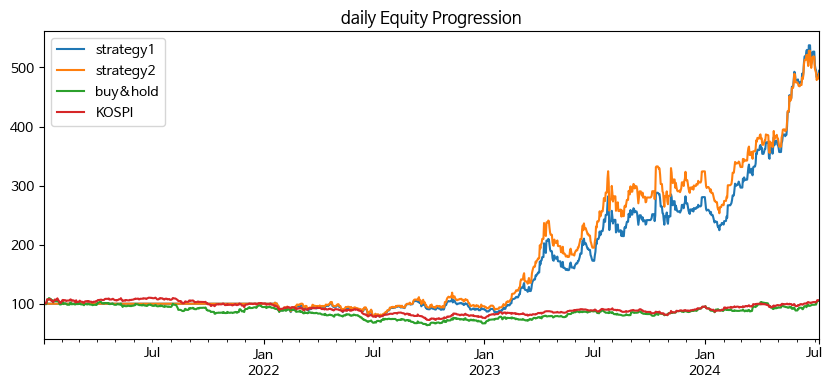

In [14]:
bm.run(figsize=(10,4), metrics=metrics2)

## define strategy for debugging or more combinations

In [15]:
import bt
import pandas as pd

name='WeighERC does not work with SelectRandomly'

algos = [
    bt.algos.SelectAll(),

    bt.algos.SelectRandomly(n=5),
    #bt.algos.SelectMomentum(n=5, lookback=pd.DateOffset(months=12)),
    
    bt.algos.RunMonthly(),

    #bt.algos.SelectHasData(lookback=pd.DateOffset(months=12)),
    bt.algos.WeighERC(lookback=pd.DateOffset(months=12)),
    #bt.algos.WeighEqually(),
    
    bt.algos.Rebalance()
]

bm4d = BacktestManager(df_k200, **kwargs_bm)
bm4d.build(name=name, algos=algos)
_ = bm4d.run(figsize=(10,4))

15 assets removed for shorter periods (7.5%)
running self.util_check_days_in_year to check days in a year
Backtesting 1 strategies: WeighERC does not work with SelectRandomly


  0%|                                                                         | 0/1 [00:00<?, ?it/s]

ERROR: Found array with 0 sample(s) (shape=(0, 5)) while a minimum of 1 is required by LedoitWolf.


## Post-processing

In [21]:
bm.get_stats(sort_by='monthly_sharpe')

,strategy1,strategy2,buy&hold,KOSPI
start,2021-01-03 00:00:00,2021-01-03 00:00:00,2021-01-03 00:00:00,2021-01-03 00:00:00
end,2024-07-05 00:00:00,2024-07-05 00:00:00,2024-07-05 00:00:00,2024-07-05 00:00:00
total_return,3.858051,3.811608,0.0492,0.05969
cagr,0.570494,0.566191,0.01381,0.016695
calmar,2.267758,2.211955,0.032847,0.048753
max_drawdown,-0.251567,-0.255969,-0.420438,-0.342432
avg_drawdown,-0.072797,-0.074728,-0.22031,-0.08767
avg_drawdown_days,24.90625,25.741935,636.0,210.666667
daily_vol,0.396943,0.405518,0.225523,0.17209
daily_sharpe,1.357287,1.330014,0.173979,0.184019


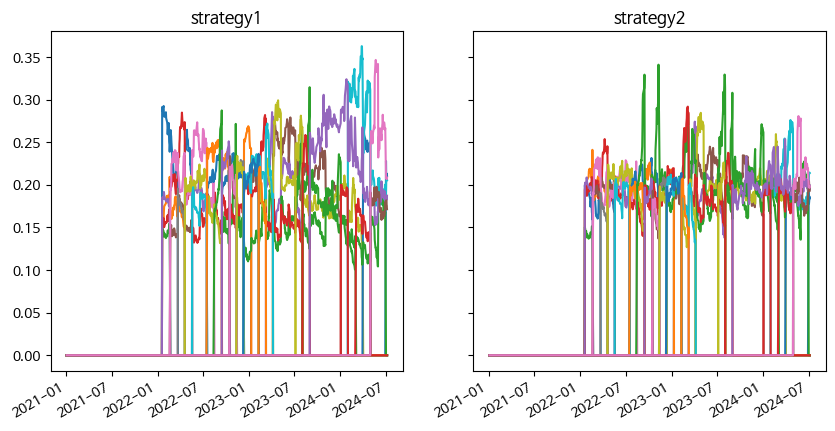

In [22]:
pf = ['strategy1', 'strategy2']
bm.plot_security_weights(pf, legend=False)

In [23]:
bm.get_historical(pf).tail()

,strategy1,strategy2
2024-07-01,504.26411,498.29481
2024-07-02,498.01811,494.31881
2024-07-03,494.80611,490.62481
2024-07-04,483.35111,478.70681
2024-07-05,485.80511,481.16081


In [24]:
bm.get_transactions(pf[1]).tail(10)

strategy2: transactions returned


price  quantity
Date       Security                    
2024-05-31 003230    529000.0      -8.0
           010120    213500.0       2.0
           022100     35350.0      82.0
           042700    161700.0       2.0
           267260    301000.0       1.0
2024-07-01 003230    615000.0      -1.0
           010120    204500.0       4.0
           022100     38750.0    -268.0
           079550    221000.0      45.0
           267260    296500.0       2.0

In [25]:
bm.get_security_weights(pf[1], stack=True)

strategy2: weights at transactions returned


Date              
2022-01-19  138040    0.199290
            052690    0.194220
            298050    0.150300
            066970    0.194100
            005070    0.199934
                        ...   
2024-07-01  079550    0.199581
            267260    0.196360
            042700    0.198806
            010120    0.196992
            003230    0.197473
Name: weight, Length: 155, dtype: float64

In [26]:
bm.get_balance(pf[0])

strategy1: quantity of securities on 2024-07-01 returned


Security
003230    17
010120    43
042700    55
079550    52
267260    32
Name: volume, dtype: int64

# Momentum

### Casestudy

In [28]:
kwargs_bm = dict(
    initial_capital = 10000000,
    commissions = 0,
    align_axis = 1, 
    days_in_year = 246,
    metrics = metrics2
)

#### Lookback

In [17]:
bm = BacktestManager(df_k200, **kwargs_bm)

15 assets removed for shorter periods (7.5%)
running self.util_check_days_in_year to check days in a year


In [18]:
kwargs_build = dict(
    select = 'Momentum', weigh = 'ERC',
    n_assets = 5,
    #lookback = 12,
    lag = 0,
    freq='M'
)

kwa_list = [{'name':f'{x} month lookback', 'lookback':x} for x in [3, 6, 12, 24]]

bm.build_batch(*kwa_list, **kwargs_build)

Backtesting 4 strategies: 3 month lookback, 6 month lookback, 12 month lookback, 24 month lookback


100%|█████████████████████████████████████████████████████████████████| 4/4 [00:04<00:00,  1.09s/it]

Returning stats


,3 month lookback,6 month lookback,12 month lookback,24 month lookback
start,2021-01-03,2021-01-03,2021-01-03,2021-01-03
end,2024-07-08,2024-07-08,2024-07-08,2024-07-08
cagr,0.33987,0.345127,0.576759,0.632677
monthly_vol,0.45902,0.484487,0.463522,0.508041
monthly_sharpe,0.847066,0.816136,1.202501,1.173682
max_drawdown,-0.493807,-0.355224,-0.251567,-0.275158
avg_drawdown,-0.112853,-0.115337,-0.072797,-0.064668
avg_drawdown_days,69.4375,64.375,25.0,15.964286


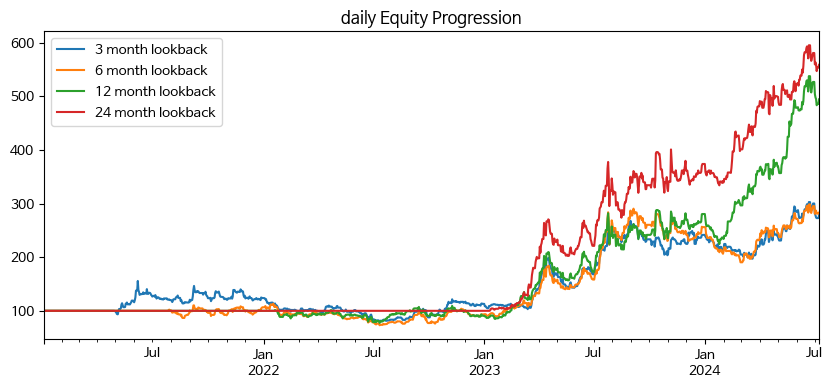

In [19]:
bm.run(figsize=(10,4))

#### Lag

In [29]:
bm = BacktestManager(df_k200, **kwargs_bm)

15 assets removed for shorter periods (7.5%)
running self.util_check_days_in_year to check days in a year


In [30]:
kwargs_build = dict(
    select = 'Momentum', weigh = 'ERC',
    n_assets = 5,
    lookback = 12,
    #lag = 0,
    freq='M'
)

kwa_list = [{'name':f'{x} day lag', 'lag':x} for x in [0, 5, 10, 20]]

bm.build_batch(*kwa_list, **kwargs_build)

Backtesting 4 strategies: 0 day lag, 5 day lag, 10 day lag, 20 day lag


100%|█████████████████████████████████████████████████████████████████| 4/4 [00:04<00:00,  1.14s/it]


Returning stats


,0 day lag,5 day lag,10 day lag,20 day lag
start,2021-01-03,2021-01-03,2021-01-03,2021-01-03
end,2024-07-08,2024-07-08,2024-07-08,2024-07-08
cagr,0.576759,0.709178,0.710707,0.546847
monthly_vol,0.463522,0.469384,0.470235,0.445065
monthly_sharpe,1.202501,1.367465,1.366932,1.192419
max_drawdown,-0.251567,-0.262851,-0.27594,-0.290619
avg_drawdown,-0.072797,-0.059227,-0.059519,-0.058802
avg_drawdown_days,25.0,17.44186,19.333333,25.4


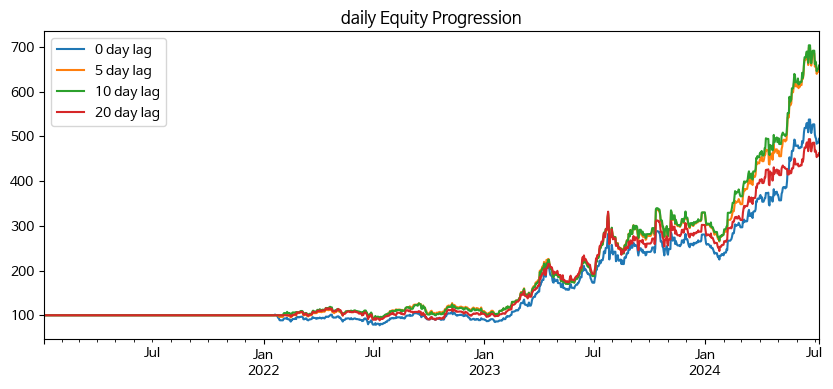

In [31]:
bm.run(figsize=(10,4))

In [33]:
bm.cross_validate()

Cross-validating 4 strategies: 0 day lag, 5 day lag, 10 day lag, 20 day lag


100%|███████████████████████████████████████████████████████████████| 10/10 [00:11<00:00,  1.10s/it]


,0 day lag,5 day lag,10 day lag,20 day lag
avg_drawdown,-0.07 ± 0.007,-0.07 ± 0.007,-0.07 ± 0.008,-0.06 ± 0.004
avg_drawdown_days,22.05 ± 3.836,19.65 ± 3.316,19.83 ± 3.732,21.76 ± 1.037
cagr,0.69 ± 0.071,0.67 ± 0.051,0.62 ± 0.057,0.53 ± 0.043
max_drawdown,-0.27 ± 0.023,-0.26 ± 0.012,-0.26 ± 0.013,-0.27 ± 0.010
monthly_sharpe,1.26 ± 0.081,1.29 ± 0.053,1.27 ± 0.069,1.16 ± 0.058
monthly_vol,0.51 ± 0.027,0.48 ± 0.026,0.46 ± 0.033,0.44 ± 0.018


#### Number of assets

In [23]:
bm = BacktestManager(df_k200, **kwargs_bm)

15 assets removed for shorter periods (7.5%)
running self.util_check_days_in_year to check days in a year


In [24]:
kwargs_build = dict(
    select = 'Momentum', weigh = 'ERC',
    #n_assets = 5,
    lookback = 12,
    lag = 5,
    freq='M'
)

kwa_list = [{'name':f'{x} assets', 'n_assets':x} for x in [2, 5, 10]]

bm.build_batch(*kwa_list, **kwargs_build)

Backtesting 3 strategies: 2 assets, 5 assets, 10 assets


100%|█████████████████████████████████████████████████████████████████| 3/3 [00:03<00:00,  1.10s/it]

Returning stats


,2 assets,5 assets,10 assets
start,2021-01-03,2021-01-03,2021-01-03
end,2024-07-08,2024-07-08,2024-07-08
cagr,0.525614,0.709178,0.455745
monthly_vol,0.589671,0.469384,0.394766
monthly_sharpe,0.97209,1.367465,1.137482
max_drawdown,-0.447827,-0.262851,-0.211912
avg_drawdown,-0.141502,-0.059227,-0.044048
avg_drawdown_days,41.3,17.44186,24.21875


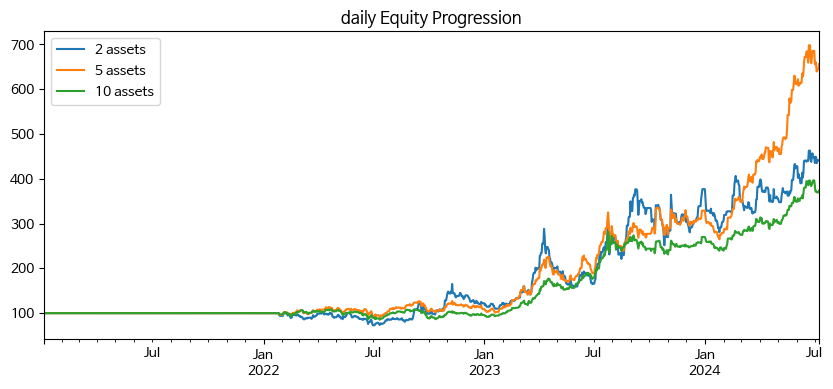

In [25]:
bm.run(figsize=(10,4))

#### Freq

In [26]:
bm = BacktestManager(df_k200, **kwargs_bm)

15 assets removed for shorter periods (7.5%)
running self.util_check_days_in_year to check days in a year


In [27]:
kwargs_build = dict(
    select = 'Momentum', weigh = 'ERC',
    n_assets = 5,
    lookback = 12,
    lag = 5,
    #freq='M'
)

kwa_list = [{'name':f'freq {x}', 'freq':x} for x in [10, 'M', 42, 'Q']]

bm.build_batch(*kwa_list, **kwargs_build)

Backtesting 4 strategies: freq 10, freq M, freq 42, freq Q


100%|█████████████████████████████████████████████████████████████████| 4/4 [00:04<00:00,  1.10s/it]

Returning stats


,freq 10,freq M,freq 42,freq Q
start,2021-01-03,2021-01-03,2021-01-03,2021-01-03
end,2024-07-08,2024-07-08,2024-07-08,2024-07-08
cagr,0.534508,0.709178,0.506245,0.249751
monthly_vol,0.437287,0.469384,0.476729,0.445601
monthly_sharpe,1.189662,1.367465,1.083996,0.702192
max_drawdown,-0.253281,-0.262851,-0.277538,-0.390407
avg_drawdown,-0.076041,-0.059227,-0.076905,-0.094715
avg_drawdown_days,26.096774,17.44186,28.103448,45.352941


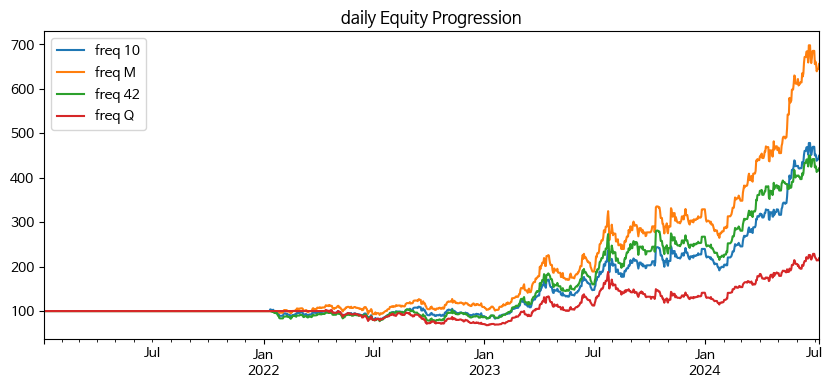

In [28]:
bm.run(figsize=(10,4))

#### Weights

In [29]:
bm = BacktestManager(df_k200, **kwargs_bm)

15 assets removed for shorter periods (7.5%)
running self.util_check_days_in_year to check days in a year


In [31]:
kwargs_build = dict(
    select = 'Momentum', 
    freq='M', n_assets=5, lookback=12, lag=5
)
kwa_list = [{'name':x, 'weigh':x} for x in ['ERC', 'InvVol', 'Equally']]
bm.build_batch(*kwa_list, **kwargs_build)

Backtesting 3 strategies: ERC, InvVol, Equally


100%|█████████████████████████████████████████████████████████████████| 3/3 [00:03<00:00,  1.07s/it]

Returning stats


,ERC,InvVol,Equally
start,2021-01-03,2021-01-03,2021-01-03
end,2024-07-08,2024-07-08,2024-07-08
cagr,0.709178,0.670422,0.685244
monthly_vol,0.469384,0.454112,0.484711
monthly_sharpe,1.367465,1.350375,1.304093
max_drawdown,-0.262851,-0.267498,-0.258585
avg_drawdown,-0.059227,-0.057641,-0.060763
avg_drawdown_days,17.44186,18.214286,19.947368


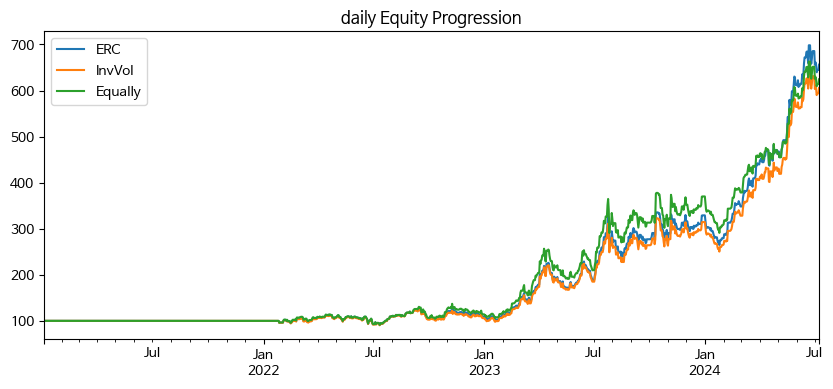

In [32]:
bm.run(figsize=(10,4))

## K-ratio

### Historicals

In [5]:
mp_k200 = MomentumPortfolio(df_k200, days_in_year=246)

15 assets removed for shorter periods (7.5%)
running self.util_check_days_in_year to check days in a year
REMINDER: make sure this is 1st transaction as no records provided


5 assets selected by Total return from 2023-07-10 to 2024-07-08
5 assets selected by K-ratio from 2023-07-10 to 2024-07-08


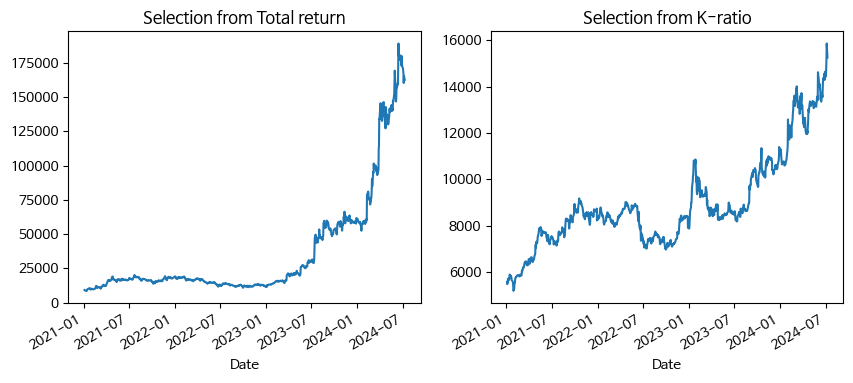

In [18]:
from matplotlib import pyplot as plt

top_simple = mp_k200.select().index[0]
top_kratio = mp_k200.select(method='k-ratio').index[0]

fig, axes = plt.subplots(1,2, figsize=(10,4))
_ = df_k200[top_simple].plot(ax=axes[0], title='Selection from Total return')
_ = df_k200[top_kratio].plot(ax=axes[1], title='Selection from K-ratio')

### Lookback

In [21]:
kwargs_bm = dict(
    initial_capital = 10000000,
    commissions = 0,
    align_axis = 1, 
    days_in_year = 246
)
bm = BacktestManager(df_k200, **kwargs_bm)

15 assets removed for shorter periods (7.5%)
running self.util_check_days_in_year to check days in a year


In [22]:
kwargs_build = dict(
    select = 'K-ratio', weigh = 'ERC',
    freq='M', n_assets=5, lag=0
)
kwa_list = [{'name':f'K-ratio: lookback {x}M', 'lookback':x} for x in [3, 6, 12]]

bm.build_batch(*kwa_list, **kwargs_build)

Backtesting 3 strategies: K-ratio: lookback 3M, K-ratio: lookback 6M, K-ratio: lookback 12M


100%|█████████████████████████████████████████████████████████████████| 3/3 [03:27<00:00, 69.13s/it]

Returning stats
CPU times: user 3min 27s, sys: 59.6 ms, total: 3min 27s
Wall time: 3min 27s


,K-ratio: lookback 3M,K-ratio: lookback 6M,K-ratio: lookback 12M
start,2021-01-03,2021-01-03,2021-01-03
end,2024-07-08,2024-07-08,2024-07-08
total_return,-0.33487,0.366952,1.762253
cagr,-0.109682,0.093143,0.33573
calmar,-0.228998,0.319494,1.604464
max_drawdown,-0.478965,-0.291533,-0.209248
avg_drawdown,-0.25223,-0.081242,-0.036304
avg_drawdown_days,579.0,102.7,24.151515
daily_vol,0.235476,0.224209,0.241496
daily_sharpe,-0.386097,0.517584,1.345224


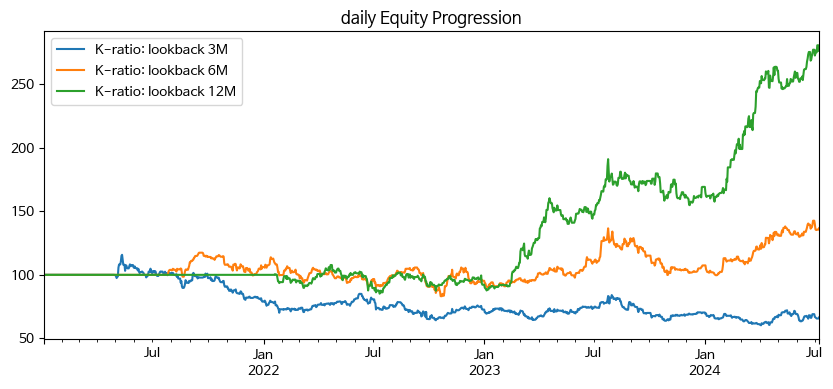

In [23]:
%%time
bm.run(figsize=(10,4))

### Compare with Simple

In [24]:
kwargs_build = dict(
    weigh = 'ERC', freq='M', n_assets=5, lookback=12, lag=5
)
bm.build(name='K-ratio', select='K-ratio', **kwargs_build)
bm.build(name='Simple', select='Momentum', **kwargs_build)

Backtesting 2 strategies: Simple, K-ratio


100%|█████████████████████████████████████████████████████████████████| 2/2 [00:59<00:00, 29.82s/it]

Returning stats


,K-ratio,Simple
start,2021-01-03,2021-01-03
end,2024-07-08,2024-07-08
total_return,1.591499,5.562445
cagr,0.311666,0.709178
calmar,1.472597,2.698026
max_drawdown,-0.211644,-0.262851
avg_drawdown,-0.030105,-0.059227
avg_drawdown_days,18.214286,17.44186
daily_vol,0.229972,0.390808
daily_sharpe,1.320148,1.595606


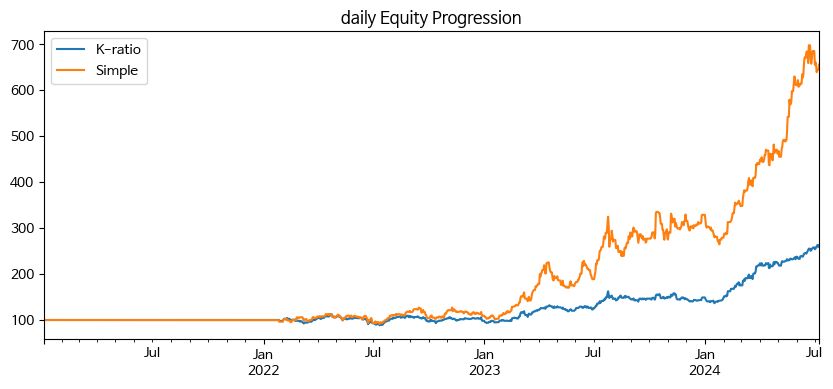

In [25]:
pf_list = ['Simple', 'K-ratio']
bm.run(pf_list, figsize=(10,4))

#### cross-validation

In [26]:
bm.cv_strategies

0) K-ratio: lookback 3M
1) K-ratio: lookback 6M
2) K-ratio: lookback 12M
3) K-ratio
4) Simple

In [27]:
pf_list = [3,4]
bm.cross_validate(pf_list, n_sample=10)

Cross-validating 2 strategies: K-ratio, Simple


100%|███████████████████████████████████████████████████████████████| 10/10 [00:12<00:00,  1.25s/it]


,K-ratio,Simple
avg_drawdown,-0.04 ± 0.006,-0.07 ± 0.004
avg_drawdown_days,32.66 ± 9.208,21.22 ± 2.290
cagr,0.25 ± 0.049,0.71 ± 0.045
calmar,1.12 ± 0.265,2.77 ± 0.189
daily_sharpe,1.08 ± 0.173,1.58 ± 0.055
daily_sortino,1.86 ± 0.300,2.83 ± 0.129
daily_vol,0.24 ± 0.005,0.40 ± 0.007
max_drawdown,-0.23 ± 0.012,-0.26 ± 0.010
monthly_sharpe,0.96 ± 0.125,1.30 ± 0.049
monthly_sortino,2.20 ± 0.458,4.69 ± 0.247


# ETF

In [34]:
days_in_year = 246

## Data

In [39]:
etf = DataManager(
    file = 'etfs_all_240708.csv',
    universe = 'ETF',
    path = path_data
)
etf.upload()

864 assets from 2021-01-04 to 2024-07-08 uploaded.
df_prices updated


## Backtest

In [47]:
kwargs_bm = dict(
    initial_capital = 10000000,
    commissions = 0,
    align_axis = 1, 
    days_in_year = days_in_year
)

kwargs_lags = dict(lookback=12, lag=5)

In [48]:
df_etfs = etf.df_prices
#df_etfs = etf.df_prices.loc['2023-01-01':]

bm = BacktestManager(df_etfs, **kwargs_bm)

454 assets removed for shorter periods (52.5%)
running self.util_check_days_in_year to check days in a year


In [49]:
kwa_list = [{'name':f'freq {x}', 'freq':x} for x in ['M', 'Q', 'Y']]

kwargs_build = dict(
    select = 'Momentum', weigh = 'ERC',
    n_assets=5, **kwargs_lags
)

bm.build_batch(*kwa_list, **kwargs_build)

In [50]:
bm.benchmark_ticker(**kwargs_lags)

Benchmark is KODEX200
RunOnce selected


Backtesting 4 strategies: freq M, freq Q, freq Y, KODEX200


100%|█████████████████████████████████████████████████████████████████| 4/4 [00:03<00:00,  1.04it/s]


Returning stats


,freq M,freq Q,freq Y,KODEX200
start,2021-01-03,2021-01-03,2021-01-03,2021-01-03
end,2024-07-08,2024-07-08,2024-07-08,2024-07-08
total_return,-0.059036,-0.040092,0.014398,0.071577
cagr,-0.017187,-0.01159,0.004081,0.019891
calmar,-0.039551,-0.024291,0.017994,0.071494
max_drawdown,-0.434558,-0.477128,-0.226801,-0.278222
avg_drawdown,-0.121345,-0.189837,-0.183139,-0.07616
avg_drawdown_days,219.75,267.0,274.0,224.75
daily_vol,0.229302,0.297812,0.149683,0.145984
daily_sharpe,0.03685,0.103652,0.102601,0.210675


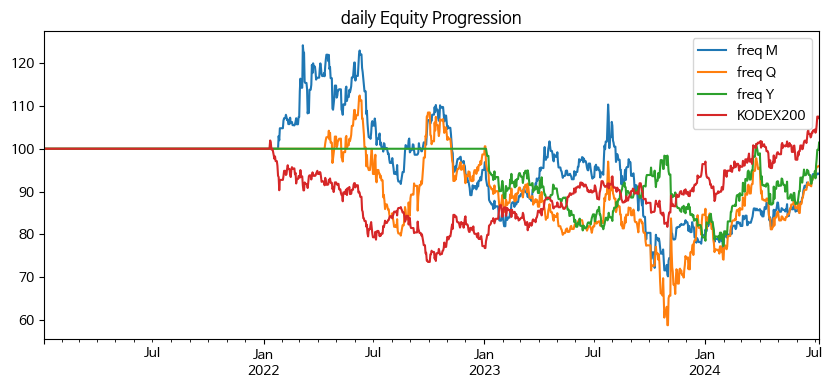

In [51]:
bm.run(figsize=(10,4))

In [52]:
kwargs_build = dict(
    name = 'K-ratio',
    freq = 'Q', select = 'K-ratio', weigh = 'ERC',
    n_assets=5, lookback=12, lag=0
)
bm.build(**kwargs_build)

In [53]:
bm.portfolios

0) freq M
1) freq Q
2) freq Y
3) KODEX200
4) K-ratio

Backtesting 3 strategies: freq M, freq Y, K-ratio


100%|█████████████████████████████████████████████████████████████████| 3/3 [02:15<00:00, 45.20s/it]

Returning stats


,freq M,freq Y,K-ratio
start,2021-01-03,2021-01-03,2021-01-03
end,2024-07-08,2024-07-08,2024-07-08
total_return,-0.059036,0.014398,0.068376
cagr,-0.017187,0.004081,0.019022
calmar,-0.039551,0.017994,17.865563
max_drawdown,-0.434558,-0.226801,-0.001065
avg_drawdown,-0.121345,-0.183139,-0.000144
avg_drawdown_days,219.75,274.0,3.487805
daily_vol,0.229302,0.149683,0.001977
daily_sharpe,0.03685,0.102601,9.734058


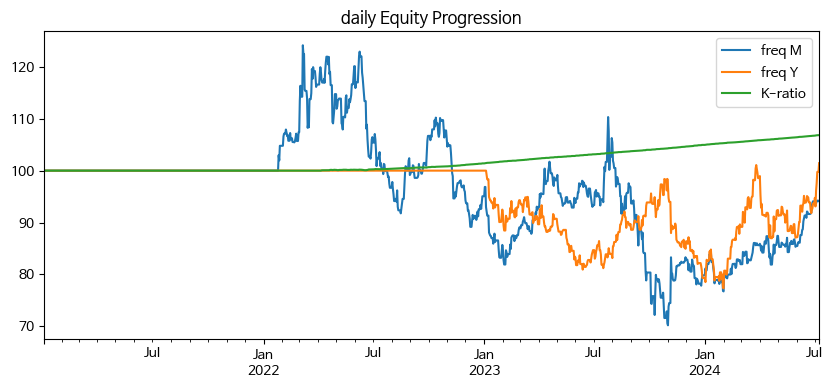

In [54]:
bm.run([0, 2, 4], figsize=(10,4))

In [26]:
df = bm.get_transactions(2)

K-ratio: transactions returned


,price,quantity
Security,,
157450,100735.0,24.0
190620,95560.0,25.0
196230,105020.0,23.0
357870,50730.0,47.0
373790,13051.0,14.0


<Axes: xlabel='Date'>

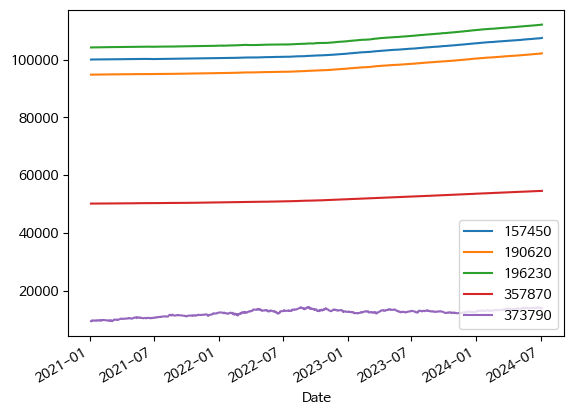

In [28]:
cols = df.loc['2022-04-06'].index
bm.df_assets[cols].plot()